## DSI Capstone Project - Exploring Time Series Visualizations

Given that our data represents 10 days worth of text ad impression delivery, it makes sense to visualize various features on a time scale to see whether we can determine any particular patterns or variances which would help us better engineer our features for model training.

To do this we will create Pandas date time features in the train data set and use Matplotlib to plot our visualizations.

In [14]:
# Import statements
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix, autocorrelation_plot
import seaborn as sns
from datetime import datetime

In [2]:
# Loading first part of training dataset, containing header row
trainaa = pd.read_csv("../assets/trainaa")

In [3]:
# Loading subsequent chunks of training data set (staying under Github 2GB file limit)
trainab = pd.read_csv("../assets/trainab", header=None, names=trainaa.columns)
trainac = pd.read_csv("../assets/trainac", header=None, names=trainaa.columns)
trainad = pd.read_csv("../assets/trainad", header=None, names=trainaa.columns)
trainae = pd.read_csv("../assets/trainae", header=None, names=trainaa.columns)

# Concatenating the pieces to assemble a complete dataframe
train = pd.concat([trainaa, trainab, trainac, trainad, trainae], ignore_index=True)

In [29]:
# Creating a datetime feature for plotting and analysis purposes
train['datetime'] = pd.to_datetime(train['hour'], format='%y%m%d%H')

In [32]:
# Making a group-by object based on our new time column
train_time = train.groupby(train.datetime)

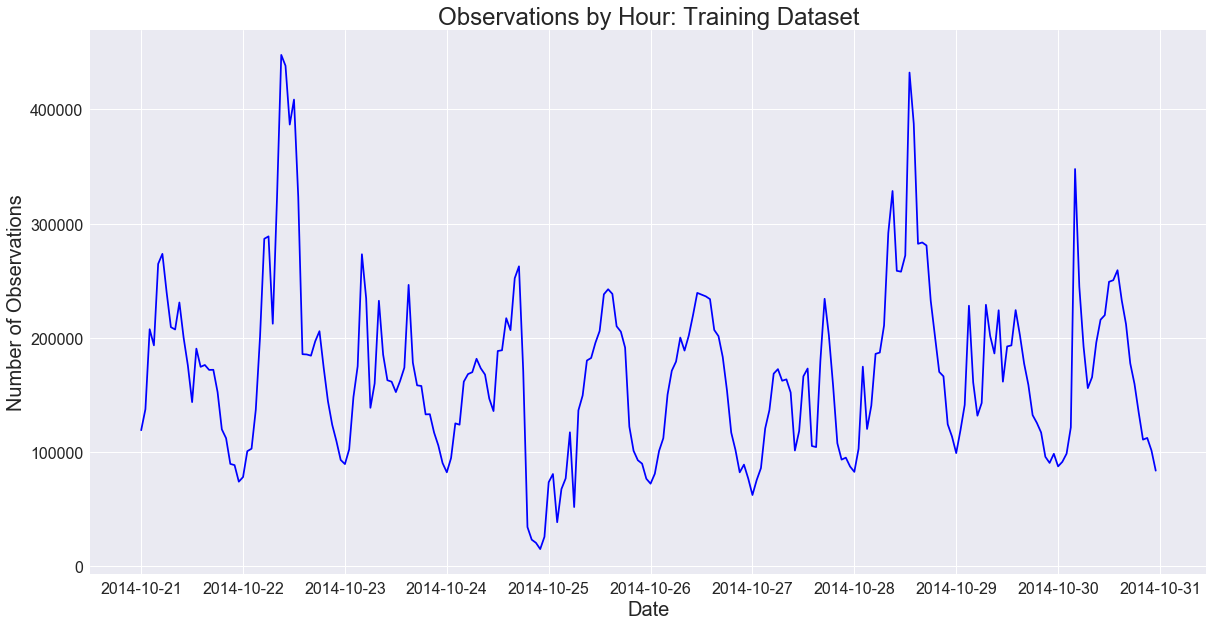

In [134]:
# Plotting observations by hour during the 10 days in our training dataset
fig, ax = plt.subplots(figsize=(20, 10))
fig = plt.plot(train_time.size(), c='b')
fig = plt.title('Observations by Hour: Training Dataset', size=24)
fig = plt.ylabel("Number of Observations", size=20)
fig = plt.xlabel('Date', size=20)
fig = plt.yticks(size=16)
fig = plt.xticks(size=16)

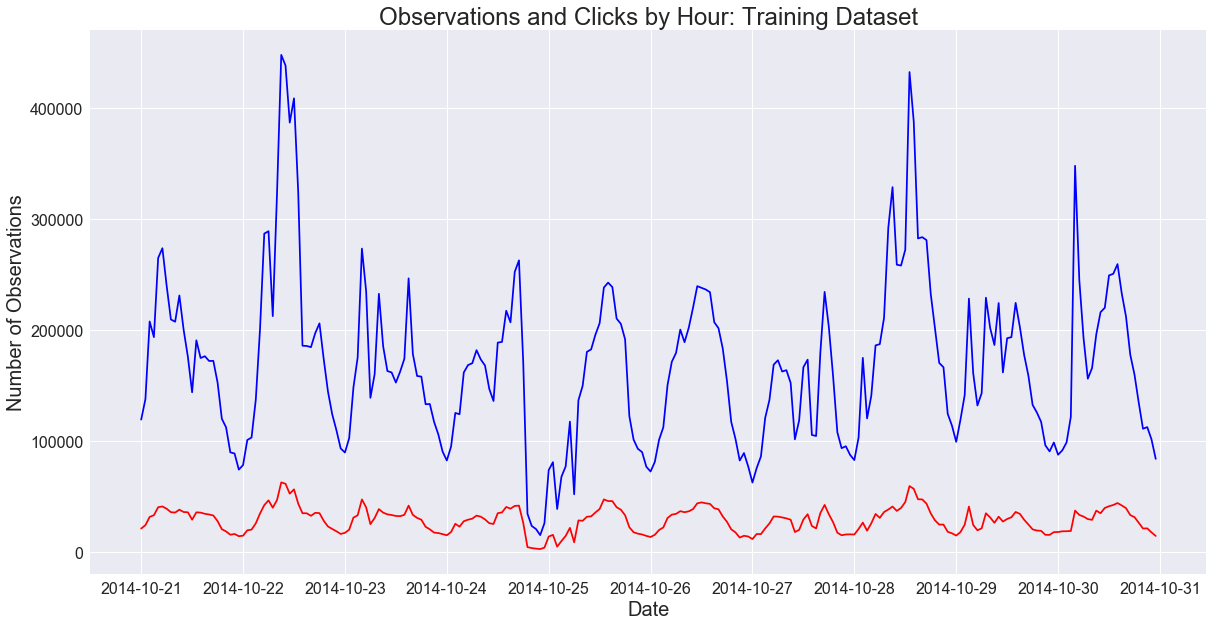

In [135]:
# Adding plot of clicks per hour to see relationship and scale. 
fig, ax = plt.subplots(figsize=(20, 10))
fig = plt.plot(train_time.size(), c='b')
fig = plt.plot(train_time.click.sum(), c='r')
fig = plt.title('Observations and Clicks by Hour: Training Dataset', size=24)
fig = plt.ylabel("Number of Observations", size=20)
fig = plt.xlabel('Date', size=20)
fig = plt.yticks(size=16)
fig = plt.xticks(size=16)

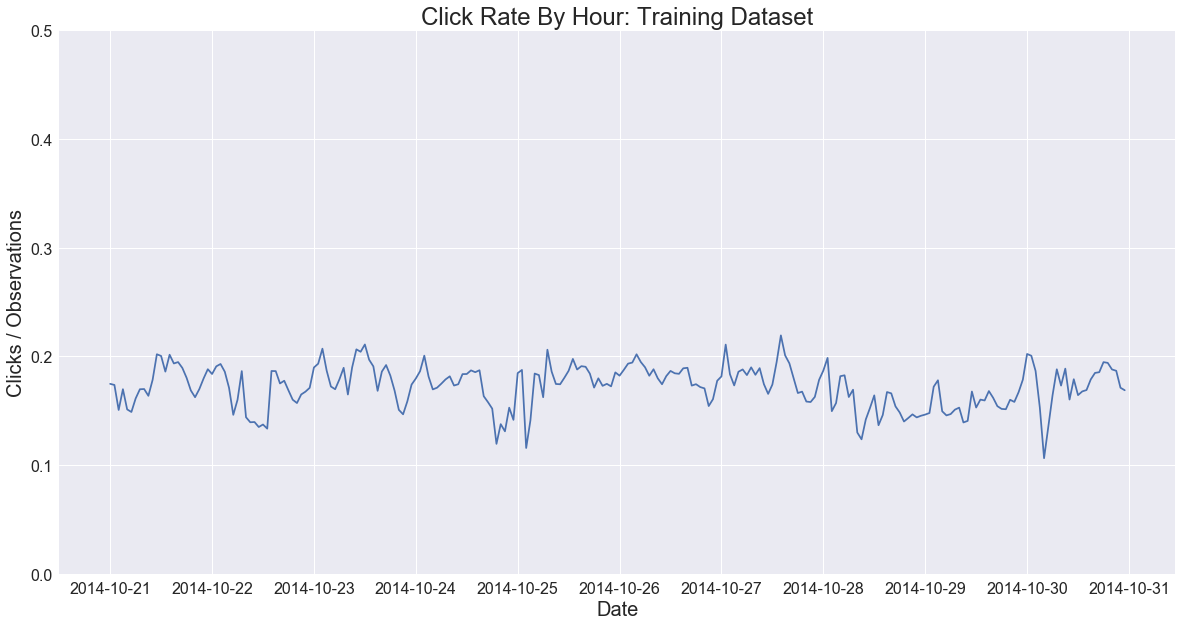

In [136]:
fig, ax = plt.subplots(figsize=(20, 10))
fig = plt.plot(train_time.click.sum()/train_time.size())
fig = plt.title('Click Rate By Hour: Training Dataset', size=24)
fig = plt.ylabel("Clicks / Observations", size=20)
fig = plt.xlabel('Date', size=20)
fig = plt.yticks(size=16)
fig = plt.xticks(size=16)
fig = plt.ylim(0.0, 0.5)

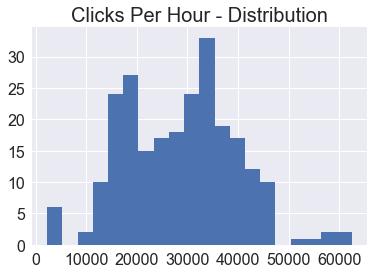

In [127]:
clicks_fig = plt.hist(train_time.click.sum(), bins=20)
clicks_fig = plt.title("Clicks Per Hour - Distribution", size=20)
clicks_fig = plt.yticks(size=16)
clicks_fig = plt.xticks(size=16)